In [1]:
import pandas as pd
import geopandas as gpd
%matplotlib inline
import requests
pd.set_option('max_colwidth', 50)
pd.set_option('max_columns', 50)

### Read data

In [2]:
realtor = pd.read_csv('Realtor Data Sets/RDC_InventoryCoreMetrics_Zip_Hist.csv')

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
realtor.head(15)

,Month,ZipCode,ZipName,Footnote,Median Listing Price,Median Listing Price M/M,Median Listing Price Y/Y,Active Listing Count,Active Listing Count M/M,Active Listing Count Y/Y,Days on Market,Days on Market M/M,Days on Market Y/Y,New Listing Count,New Listing Count M/M,New Listing Count Y/Y,Price Increase Count,Price Increase Count M/M,Price Increase Count Y/Y,Price Decrease Count,Price Decrease Count M/M,Price Decrease Count Y/Y,Pending Listing Count,Pending Listing Count M/M,Pending Listing Count Y/Y,Avg Listing Price,Avg Listing Price M/M,Avg Listing Price Y/Y,Total Listing Count,Total Listing Count M/M,Total Listing Count Y/Y,Pending Ratio,Pending Ratio M/M,Pending Ratio Y/Y
0,2017-06-01,1001.0,"Agawam, MA",NaN,214400.0,-0.0129,0.1069,50.0,-0.1935,-0.3506,40.0,0.8182,-0.3443,16.0,-0.4667,-0.4286,0.0,NaN,NaN,16.0,-0.2727,-0.1111,1.0,0.0,0.0,243500.0,0.0505,0.0327,51.0,-0.1905,-0.3462,0.0200,0.0039,0.0070
1,2017-06-01,1002.0,"Amherst, MA",NaN,374700.0,-0.0507,0.1185,111.0,0.0472,-0.2071,67.0,0.0000,-0.1928,40.0,0.8182,0.1765,0.0,NaN,NaN,22.0,0.3750,-0.2667,0.0,NaN,NaN,417200.0,0.0068,0.0845,111.0,0.0472,-0.2071,0.0000,0.0000,0.0000
2,2017-06-01,1005.0,"Barre, MA",NaN,268000.0,-0.0212,0.1703,25.0,0.1905,-0.3421,59.0,0.4048,-0.2237,4.0,-0.5000,-0.7143,0.0,-1.0,NaN,6.0,0.5000,-0.4000,0.0,NaN,NaN,259600.0,-0.0431,0.0583,25.0,0.1905,-0.3421,0.0000,0.0000,0.0000
3,2017-06-01,1007.0,"Belchertown, MA",*,336100.0,-0.0397,NaN,79.0,0.0395,-0.4148,61.0,0.0517,-0.3222,26.0,-0.1333,-0.1875,0.0,NaN,-1.0,16.0,0.0000,-0.2000,0.0,NaN,NaN,333100.0,-0.0453,0.0843,79.0,0.0395,-0.4148,0.0000,0.0000,0.0000
4,2017-06-01,1008.0,"Blandford, MA",NaN,199900.0,-0.0580,0.0045,14.0,-0.1765,-0.2632,40.0,-0.2308,-0.5833,2.0,-0.8000,0.0000,0.0,NaN,NaN,0.0,-1.0000,NaN,1.0,NaN,-0.5,237300.0,-0.0730,-0.4057,15.0,-0.1176,-0.2857,0.0714,0.0714,-0.0338
5,2017-06-01,1010.0,"Brimfield, MA",NaN,255200.0,0.0151,-0.0545,21.0,0.3125,-0.3636,37.0,-0.0976,-0.2885,10.0,1.5000,0.2500,0.0,NaN,NaN,10.0,1.5000,-0.1667,0.0,NaN,NaN,297800.0,0.0431,0.0265,21.0,0.3125,-0.3636,0.0000,0.0000,0.0000
6,2017-06-01,1013.0,"Chicopee, MA",*,187400.0,0.0146,NaN,29.0,-0.2368,-0.4821,37.0,0.0000,-0.4559,12.0,-0.4000,-0.1429,0.0,NaN,NaN,6.0,-0.5000,-0.5714,0.0,NaN,NaN,196700.0,0.0234,0.1476,29.0,-0.2368,-0.4821,0.0000,0.0000,0.0000
7,2017-06-01,1020.0,"Chicopee, MA",NaN,187400.0,0.0440,0.0558,68.0,0.0000,-0.3267,41.0,0.2424,-0.1087,32.0,0.0000,0.2308,0.0,NaN,NaN,26.0,0.6250,0.3000,0.0,NaN,NaN,202900.0,0.0416,0.1063,68.0,0.0000,-0.3267,0.0000,0.0000,0.0000
8,2017-06-01,1022.0,"Chicopee, MA",NaN,119400.0,0.0008,0.0383,11.0,0.2222,-0.3125,32.0,-0.5077,-0.7168,2.0,-0.6667,NaN,0.0,NaN,NaN,4.0,1.0000,1.0000,0.0,NaN,NaN,123900.0,0.0360,0.0821,11.0,0.2222,-0.3125,0.0000,0.0000,0.0000
9,2017-06-01,1027.0,"Easthampton, MA",NaN,273000.0,0.0325,0.0541,29.0,0.0741,-0.5735,33.0,0.1379,-0.1750,18.0,-0.1818,-0.1818,0.0,NaN,NaN,4.0,-0.5000,-0.6667,0.0,NaN,NaN,305600.0,0.0252,0.0806,29.0,0.0741,-0.5735,0.0000,0.0000,0.0000


In [5]:
realtor.shape

(928972, 34)

In [6]:
realtor['Month'].value_counts()

2016-07-01                                                                                                               15035
2016-06-01                                                                                                               15035
2016-04-01                                                                                                               15035
2016-05-01                                                                                                               15035
2016-08-01                                                                                                               15033
2016-09-01                                                                                                               15033
2016-02-01                                                                                                               15032
2016-03-01                                                                                                     

In [7]:
realtor['ZipName'].value_counts()

Houston, TX            4836
Chicago, IL            3410
Miami, FL              3286
San Antonio, TX        3038
Philadelphia, PA       2852
Los Angeles, CA        2790
Minneapolis, MN        2790
Las Vegas, NV          2575
Phoenix, AZ            2542
Saint Louis, MO        2418
Cincinnati, OH         2356
Pittsburgh, PA         2294
Austin, TX             2232
Atlanta, GA            2232
Indianapolis, IN       2170
Dallas, TX             2108
New York, NY           2108
Kansas City, MO        1984
Brooklyn, NY           1973
Oklahoma City, OK      1922
Denver, CO             1860
Louisville, KY         1860
Orlando, FL            1860
San Diego, CA          1798
Tucson, AZ             1736
Fort Lauderdale, FL    1674
Saint Paul, MN         1674
Portland, OR           1674
Jacksonville, FL       1674
Columbus, OH           1612
                       ... 
McClellanville, SC       31
McQueeney, TX            31
McHenry, MD              31
McGregor, TX             31
McGaheysville, VA   

In [8]:
realtor['ZipCode'].value_counts()

32766.0    62
13811.0    62
55313.0    62
55309.0    62
13827.0    62
55306.0    62
55305.0    62
55304.0    62
55303.0    62
55302.0    62
55301.0    62
13825.0    62
13820.0    62
13815.0    62
3452.0     62
55369.0    62
3451.0     62
13803.0    62
37920.0    62
3449.0     62
13790.0    62
3447.0     62
13787.0    62
3446.0     62
13783.0    62
55130.0    62
55129.0    62
55128.0    62
55315.0    62
55316.0    62
           ..
22840.0    31
27301.0    31
37353.0    31
15057.0    31
37101.0    31
30555.0    31
49853.0    31
69001.0    31
17049.0    31
78123.0    31
17344.0    31
49657.0    31
66054.0    31
29835.0    31
31055.0    31
21541.0    31
44437.0    31
38201.0    31
40447.0    31
76657.0    31
29458.0    31
53532.0    25
27871.0    24
1237.0     22
52742.0    21
70068.0    20
24523.0    17
66040.0    15
44142.0    15
46350.0    15
Name: ZipCode, Length: 15035, dtype: int64

### Sort data by ZipName, then Month

In [3]:
realtor.sort_values(by=['ZipName', 'Month'])

,Month,ZipCode,ZipName,Footnote,Median Listing Price,Median Listing Price M/M,Median Listing Price Y/Y,Active Listing Count,Active Listing Count M/M,Active Listing Count Y/Y,Days on Market,Days on Market M/M,Days on Market Y/Y,New Listing Count,New Listing Count M/M,New Listing Count Y/Y,Price Increase Count,Price Increase Count M/M,Price Increase Count Y/Y,Price Decrease Count,Price Decrease Count M/M,Price Decrease Count Y/Y,Pending Listing Count,Pending Listing Count M/M,Pending Listing Count Y/Y,Avg Listing Price,Avg Listing Price M/M,Avg Listing Price Y/Y,Total Listing Count,Total Listing Count M/M,Total Listing Count Y/Y,Pending Ratio,Pending Ratio M/M,Pending Ratio Y/Y
920414,2012-05-01,36310.0,"Abbeville, AL",NaN,189300.0,-0.0487,NaN,66.0,0.0154,NaN,133.0,-0.0699,NaN,16.0,-0.2000,NaN,0.0,NaN,NaN,2.0,-0.6667,NaN,0.0,NaN,NaN,218700.0,-0.0149,NaN,66.0,0.0154,NaN,0.0000,0.0000,NaN
905392,2012-06-01,36310.0,"Abbeville, AL",NaN,199500.0,0.0539,NaN,67.0,0.0152,NaN,114.0,-0.1429,NaN,6.0,-0.6250,NaN,0.0,NaN,NaN,6.0,2.0000,NaN,0.0,NaN,NaN,223600.0,0.0224,NaN,67.0,0.0152,NaN,0.0000,0.0000,NaN
890370,2012-07-01,36310.0,"Abbeville, AL",NaN,199900.0,0.0020,NaN,64.0,-0.0448,NaN,116.0,0.0175,NaN,12.0,1.0000,NaN,0.0,NaN,NaN,12.0,1.0000,NaN,0.0,NaN,NaN,220700.0,-0.0130,NaN,64.0,-0.0448,NaN,0.0000,0.0000,NaN
875346,2012-08-01,36310.0,"Abbeville, AL",NaN,187300.0,-0.0630,NaN,67.0,0.0469,NaN,141.0,0.2155,NaN,10.0,-0.1667,NaN,0.0,NaN,NaN,10.0,-0.1667,NaN,0.0,NaN,NaN,215000.0,-0.0258,NaN,67.0,0.0469,NaN,0.0000,0.0000,NaN
860322,2012-09-01,36310.0,"Abbeville, AL",NaN,199500.0,0.0651,NaN,57.0,-0.1493,NaN,165.0,0.1702,NaN,4.0,-0.6000,NaN,0.0,NaN,NaN,4.0,-0.6000,NaN,0.0,NaN,NaN,212500.0,-0.0116,NaN,57.0,-0.1493,NaN,0.0000,0.0000,NaN
845344,2012-10-01,36310.0,"Abbeville, AL",NaN,216000.0,0.0827,NaN,54.0,-0.0526,NaN,165.0,0.0000,NaN,18.0,3.5000,NaN,0.0,NaN,NaN,2.0,-0.5000,NaN,0.0,NaN,NaN,212000.0,-0.0024,NaN,54.0,-0.0526,NaN,0.0000,0.0000,NaN
830406,2012-11-01,36310.0,"Abbeville, AL",NaN,203700.0,-0.0569,NaN,55.0,0.0185,NaN,169.0,0.0242,NaN,4.0,-0.7778,NaN,0.0,NaN,NaN,0.0,-1.0000,NaN,0.0,NaN,NaN,208500.0,-0.0165,NaN,55.0,0.0185,NaN,0.0000,0.0000,NaN
815467,2012-12-01,36310.0,"Abbeville, AL",NaN,219500.0,0.0776,NaN,53.0,-0.0364,NaN,181.0,0.0710,NaN,8.0,1.0000,NaN,0.0,NaN,NaN,4.0,NaN,NaN,0.0,NaN,NaN,214100.0,0.0269,NaN,53.0,-0.0364,NaN,0.0000,0.0000,NaN
800528,2013-01-01,36310.0,"Abbeville, AL",NaN,219900.0,0.0018,NaN,53.0,0.0000,NaN,170.0,-0.0608,NaN,12.0,0.5000,NaN,0.0,NaN,NaN,2.0,-0.5000,NaN,0.0,NaN,NaN,225400.0,0.0528,NaN,53.0,0.0000,NaN,0.0000,0.0000,NaN
785590,2013-02-01,36310.0,"Abbeville, AL",NaN,225000.0,0.0232,NaN,58.0,0.0943,NaN,156.0,-0.0824,NaN,18.0,0.5000,NaN,0.0,NaN,NaN,4.0,1.0000,NaN,0.0,NaN,NaN,223400.0,-0.0089,NaN,58.0,0.0943,NaN,0.0000,0.0000,NaN


In [5]:
realtor[~realtor.Month.str.contains('^\d')]

,Month,ZipCode,ZipName,Footnote,Median Listing Price,Median Listing Price M/M,Median Listing Price Y/Y,Active Listing Count,Active Listing Count M/M,Active Listing Count Y/Y,Days on Market,Days on Market M/M,Days on Market Y/Y,New Listing Count,New Listing Count M/M,New Listing Count Y/Y,Price Increase Count,Price Increase Count M/M,Price Increase Count Y/Y,Price Decrease Count,Price Decrease Count M/M,Price Decrease Count Y/Y,Pending Listing Count,Pending Listing Count M/M,Pending Listing Count Y/Y,Avg Listing Price,Avg Listing Price M/M,Avg Listing Price Y/Y,Total Listing Count,Total Listing Count M/M,Total Listing Count Y/Y,Pending Ratio,Pending Ratio M/M,Pending Ratio Y/Y
928971,* some year-over-year metrics may not be avail...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Get rid of that footnote row

In [4]:
realtor = realtor[realtor.Month.str.contains('^\d')]

### Turn Month to date format

In [5]:
realtor['Month'] = pd.to_datetime(realtor['Month'], format='%Y-%m-%d')

### Get rid of the pct change columns

In [6]:
realtor = realtor[['Month', 'ZipCode', 'ZipName', 'Active Listing Count ', 'Days on Market ', 'New Listing Count ', 'Price Increase Count ', 'Price Decrease Count ', 'Pending Listing Count ', 'Avg Listing Price', 'Total Listing Count', 'Pending Ratio']]

### Reset index to be the month

In [7]:
realtor.set_index('Month', inplace=True)

In [8]:
realtor.head(5)

,ZipCode,ZipName,Active Listing Count,Days on Market,New Listing Count,Price Increase Count,Price Decrease Count,Pending Listing Count,Avg Listing Price,Total Listing Count,Pending Ratio
Month,,,,,,,,,,,
2017-06-01,1001.0,"Agawam, MA",50.0,40.0,16.0,0.0,16.0,1.0,243500.0,51.0,0.0200
2017-06-01,1002.0,"Amherst, MA",111.0,67.0,40.0,0.0,22.0,0.0,417200.0,111.0,0.0000
2017-06-01,1005.0,"Barre, MA",25.0,59.0,4.0,0.0,6.0,0.0,259600.0,25.0,0.0000
2017-06-01,1007.0,"Belchertown, MA",79.0,61.0,26.0,0.0,16.0,0.0,333100.0,79.0,0.0000
2017-06-01,1008.0,"Blandford, MA",14.0,40.0,2.0,0.0,0.0,1.0,237300.0,15.0,0.0714


### Avg Listing Price by ZipName, ordered by highest

In [9]:
realtor.groupby('ZipName')['Avg Listing Price'].mean()

ZipName
Abbeville, AL        2.189516e+05
Abbeville, LA        1.583016e+05
Abbeville, SC        2.069726e+05
Abbot, ME            1.676339e+05
Abbottstown, PA      2.496935e+05
Aberdeen, MD         2.299403e+05
Aberdeen, MS         1.697758e+05
Aberdeen, NC         2.276403e+05
Aberdeen, SD         1.967823e+05
Aberdeen, WA         1.507597e+05
Abilene, KS          1.476565e+05
Abilene, TX          1.696461e+05
Abingdon, MD         2.485387e+05
Abingdon, VA         2.833548e+05
Abington, MA         3.564548e+05
Abington, PA         2.511984e+05
Abiquiu, NM          1.037256e+06
Abita Springs, LA    2.925403e+05
Absarokee, MT        3.823790e+05
Absecon, NJ          2.088145e+05
Acampo, CA           7.177581e+05
Accokeek, MD         3.556306e+05
Accord, NY           4.230597e+05
Acton, CA            5.440403e+05
Acton, MA            5.350387e+05
Acton, ME            3.492161e+05
Acushnet, MA         3.272274e+05
Acworth, GA          2.768040e+05
Ada, MI              5.159839e+05
Ada, O

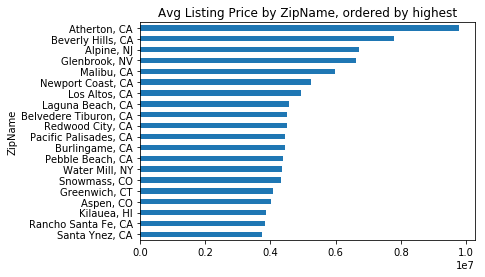

In [16]:
ax = realtor.groupby('ZipName')['Avg Listing Price'].mean().sort_values(ascending=True).tail(20).plot(kind='barh')
ax.set_title('Avg Listing Price by ZipName, ordered by highest')

### Resample by Annually , avg listing price

In [17]:
realtor.resample('A').mean()

,ZipCode,Active Listing Count,Days on Market,New Listing Count,Price Increase Count,Price Decrease Count,Pending Listing Count,Avg Listing Price,Total Listing Count,Pending Ratio
Month,,,,,,,,,,
2012-12-31,46625.224850,126.448048,106.443591,28.008322,1.092196,18.271244,0.000000,309996.000133,126.448048,0.000000
2013-12-31,46626.968593,116.128005,99.194860,29.867085,1.364413,16.844872,0.000000,324940.899151,116.128005,0.000000
2014-12-31,46624.960836,120.381124,99.096787,29.990467,1.185556,19.851348,4.062097,341036.979963,124.443222,0.035710
2015-12-31,46624.808343,109.089280,92.440693,29.575272,1.103222,19.403088,14.723473,364706.259165,123.812753,0.141185
2016-12-31,46625.100768,101.949466,89.120353,27.269676,1.090458,18.268479,14.584332,384687.893722,116.533798,0.154383
2017-12-31,46629.617099,89.264105,85.157518,28.952606,1.181481,16.266334,16.342814,403206.870703,105.606919,0.198739


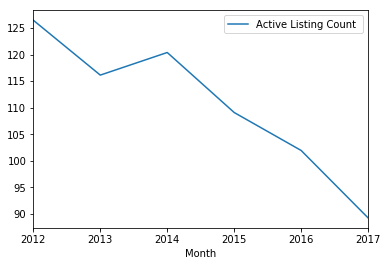

In [20]:
realtor.resample('A').mean().plot(y='Active Listing Count ')

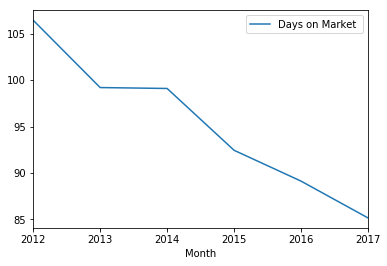

In [21]:
realtor.resample('A').mean().plot(y='Days on Market ')

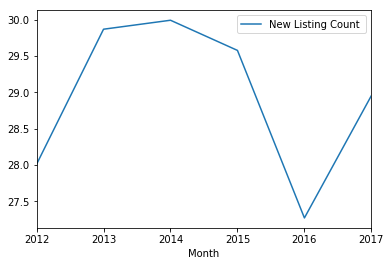

In [22]:
realtor.resample('A').mean().plot(y='New Listing Count ')

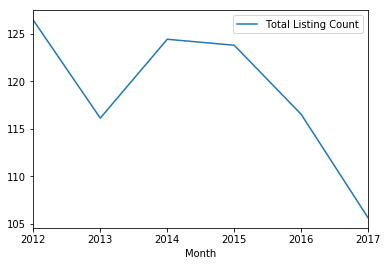

In [24]:
realtor.resample('A').mean().plot(y='Total Listing Count')

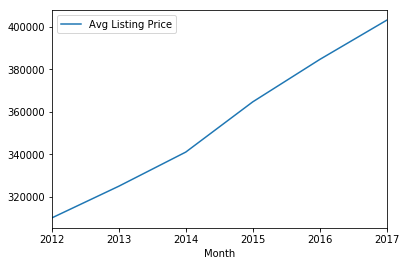

In [25]:
realtor.resample('A').mean().plot(y='Avg Listing Price')

### Resample by ZipName by Year

In [26]:
realtor.groupby('ZipName').resample('A').mean()

ZipCode  Active Listing Count   Days on Market   \
ZipName         Month                                                         
Abbeville, AL   2012-12-31  36310.0              60.375000       148.000000   
                2013-12-31  36310.0              69.916667       143.833333   
                2014-12-31  36310.0              81.833333       184.083333   
                2015-12-31  36310.0              73.083333       164.500000   
                2016-12-31  36310.0              99.250000       152.833333   
                2017-12-31  36310.0             103.833333       207.000000   
Abbeville, LA   2012-12-31  70510.0              87.625000       106.000000   
                2013-12-31  70510.0              68.750000       118.833333   
                2014-12-31  70510.0              62.166667       101.416667   
                2015-12-31  70510.0              49.500000        96.000000   
                2016-12-31  70510.0              72.666667       102.166667   
                2017-12-31  70510.0              79.833333        84.500000   
Abbeville, SC   2012-12-31  29620.0              70.250000       141.750000   
                2013-12-31  29620.0              72.416667       137.416667   
                2014-12-31  29620.0              59.000000       120.333333   
                2015-12-31  29620.0              55.000000       111.416667   
                2016-12-31  29620.0              53.000000        95.333333   
                2017-12-31  29620.0              52.666667        88.166667   
Abbot, ME       2012-12-31   4406.0              12.500000       166.250000   
                2013-12-31   4406.0              17.583333       162.000000   
                2014-12-31   4406.0              21.000000       164.916667   
                2015-12-31   4406.0              21.916667       162.833333   
                2016-12-31   4406.0              14.916667       183.916667   
                2017-12-31   4406.0               9.166667       191.666667   
Abbottstown, PA 2012-12-31  17301.0              28.625000       126.500000   
                2013-12-31  17301.0              21.500000       112.166667   
                2014-12-31  17301.0              26.916667        86.750000   
                2015-12-31  17301.0              26.166667        86.583333   
                2016-12-31  17301.0              19.583333        83.750000   
                2017-12-31  17301.0              25.000000        76.666667   
...                             ...                    ...              ...   
Zionsville, IN  2012-12-31  46077.0             243.875000        86.000000   
                2013-12-31  46077.0             216.833333        71.750000   
                2014-12-31  46077.0             214.666667        70.666667   
                2015-12-31  46077.0             207.666667        79.250000   
                2016-12-31  46077.0             201.833333        75.250000   
                2017-12-31  46077.0             187.166667        67.333333   
Zionsville, PA  2012-12-31  18092.0              24.625000       121.500000   
                2013-12-31  18092.0              21.416667        82.750000   
                2014-12-31  18092.0              27.583333        92.750000   
                2015-12-31  18092.0              24.000000        79.500000   
                2016-12-31  18092.0              18.083333        84.750000   
                2017-12-31  18092.0              15.833333        90.500000   
Zionville, NC   2012-12-31  28698.0              39.375000       143.875000   
                2013-12-31  28698.0              30.916667       163.000000   
                2014-12-31  28698.0              37.833333       133.166667   
                2015-12-31  28698.0              36.333333       163.166667   
                2016-12-31  28698.0              26.666667       136.166667   
                2017-12-31  28698.0              27.166667       188.333333   

### Resample by ZipName by 5 Years

In [85]:
resampled5A = realtor.groupby('ZipName').resample('5A').mean()

### Percent change on Avg Listing Price

In [96]:
resamplednew = resampled5A.pct_change().reset_index()

### Plot 10 highest avg price increases

In [104]:
resamplednew[resamplednew['Month'] > '2017'].sort_values(by='Avg Listing Price', ascending=False).head(10)

,ZipName,Month,ZipCode,Active Listing Count,Days on Market,New Listing Count,Price Increase Count,Price Decrease Count,Pending Listing Count,Avg Listing Price,Total Listing Count,Pending Ratio
4797,"DeForest, WI",2019-12-31,0.0,inf,-0.702590,inf,inf,inf,NaN,28.501515,inf,-1.000000
8393,"Hempstead, TX",2017-12-31,0.0,0.130584,0.020401,-0.040258,inf,-0.094017,inf,2.352391,0.292478,inf
13413,"New Ulm, TX",2017-12-31,0.0,0.607682,-0.493309,3.222222,NaN,0.629630,inf,2.259547,0.686328,inf
173,"Alberton, MT",2017-12-31,0.0,0.387048,0.021358,0.407407,NaN,2.851852,NaN,1.960153,0.387048,NaN
21087,"Woodstock, CT",2017-12-31,0.0,-0.091877,-0.131678,0.194255,inf,0.014972,inf,1.761177,-0.085924,inf
7345,"Goleta, CA",2017-12-31,0.0,-0.355462,-0.359028,-0.039591,-0.762963,0.690236,inf,1.721141,-0.208246,inf
15809,"Ramsay, MT",2017-12-31,0.0,2.338820,0.759536,1.370370,NaN,inf,inf,1.688941,2.349794,inf
8319,"Hazel Park, MI",2017-12-31,0.0,-0.515327,-0.081341,-0.408000,0.629630,-0.446541,inf,1.671668,-0.511846,inf
11835,"Mayodan, NC",2017-12-31,0.0,0.254438,-0.342646,-0.026455,inf,2.456790,inf,1.621034,0.278983,inf
20147,"Weimar, TX",2017-12-31,0.0,0.428241,-0.263400,0.925926,NaN,1.518519,inf,1.597101,0.534722,inf


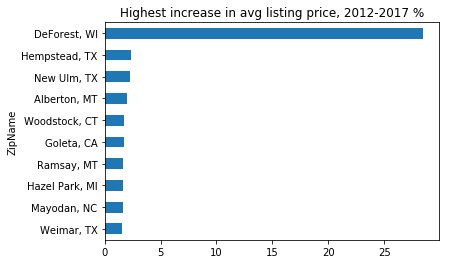

In [115]:
ax = resamplednew[resamplednew['Month'] > '2017'].sort_values(by='Avg Listing Price', ascending=True).tail(10).plot(kind='barh', x='ZipName', y='Avg Listing Price', legend=False)
ax.set_title('Highest increase in avg listing price, 2012-2017 %')

### Plot 10 highest price decreases

In [109]:
resamplednew[resamplednew['Month'] > '2017'].sort_values(by='Avg Listing Price', ascending=True).head(10)

,ZipName,Month,ZipCode,Active Listing Count,Days on Market,New Listing Count,Price Increase Count,Price Decrease Count,Pending Listing Count,Avg Listing Price,Total Listing Count,Pending Ratio
3407,"Cherokee, IA",2017-12-31,0.0,0.503086,-0.319860,0.540741,NaN,0.944444,inf,-0.750110,0.515432,inf
9673,"Kemmerer, WY",2017-12-31,0.0,1.524328,-0.007140,1.255144,NaN,0.415638,inf,-0.750096,1.582426,inf
18201,"Stateline, NV",2017-12-31,0.0,-0.127248,0.014151,0.039683,inf,0.181481,inf,-0.738361,-0.105618,inf
14923,"Perry, GA",2017-12-31,0.0,-0.025532,-0.104685,0.066859,-0.086420,0.082204,inf,-0.678374,-0.024357,inf
13105,"Nashport, OH",2017-12-31,0.0,-0.186240,0.060113,-0.163163,inf,0.246187,inf,-0.652773,-0.144033,inf
1089,"Barnwell, SC",2017-12-31,0.0,0.808593,-0.183936,1.933333,inf,6.111111,NaN,-0.561046,0.808593,NaN
12409,"Mineral Wells, TX",2017-12-31,0.0,-0.178656,-0.010741,-0.159933,inf,-0.172414,inf,-0.546583,-0.135878,inf
19989,"Waterloo, NY",2017-12-31,0.0,0.268632,0.059248,0.180247,NaN,1.222222,NaN,-0.527873,0.268632,NaN
2341,"Brooksville, ME",2017-12-31,0.0,0.141895,-0.348690,0.679012,NaN,0.481481,inf,-0.527140,0.157287,inf
895,"Avinger, TX",2017-12-31,0.0,-0.067277,0.109304,-0.282651,NaN,0.063973,inf,-0.511065,-0.064503,inf


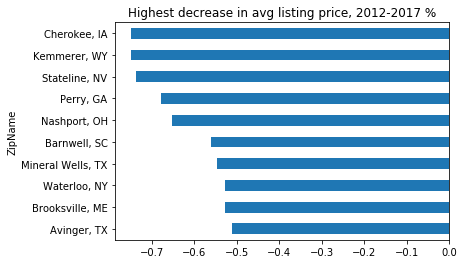

In [118]:
ax = resamplednew[resamplednew['Month'] > '2017'].sort_values(by='Avg Listing Price', ascending=False).tail(10).plot(kind='barh', x='ZipName', y='Avg Listing Price',  legend=False)
ax.set_title('Highest decrease in avg listing price, 2012-2017 %')

### Keep only June 2012 to June 2017 data

In [18]:
realtor_Jun2012Jun2017 = realtor[:'2012-05']
realtor_Jun2012Jun2017

,ZipCode,ZipName,Active Listing Count,Days on Market,New Listing Count,Price Increase Count,Price Decrease Count,Pending Listing Count,Avg Listing Price,Total Listing Count,Pending Ratio
Month,,,,,,,,,,,
2017-06-01,1001.0,"Agawam, MA",50.0,40.0,16.0,0.0,16.0,1.0,243500.0,51.0,0.0200
2017-06-01,1002.0,"Amherst, MA",111.0,67.0,40.0,0.0,22.0,0.0,417200.0,111.0,0.0000
2017-06-01,1005.0,"Barre, MA",25.0,59.0,4.0,0.0,6.0,0.0,259600.0,25.0,0.0000
2017-06-01,1007.0,"Belchertown, MA",79.0,61.0,26.0,0.0,16.0,0.0,333100.0,79.0,0.0000
2017-06-01,1008.0,"Blandford, MA",14.0,40.0,2.0,0.0,0.0,1.0,237300.0,15.0,0.0714
2017-06-01,1010.0,"Brimfield, MA",21.0,37.0,10.0,0.0,10.0,0.0,297800.0,21.0,0.0000
2017-06-01,1013.0,"Chicopee, MA",29.0,37.0,12.0,0.0,6.0,0.0,196700.0,29.0,0.0000
2017-06-01,1020.0,"Chicopee, MA",68.0,41.0,32.0,0.0,26.0,0.0,202900.0,68.0,0.0000
2017-06-01,1022.0,"Chicopee, MA",11.0,32.0,2.0,0.0,4.0,0.0,123900.0,11.0,0.0000


In [19]:
realtor_Jun2012Jun2017.groupby('ZipName').resample('5A').mean()

ZipCode  Active Listing Count   Days on Market   \
ZipName         Month                                                         
Abbeville, AL   2012-12-31  36310.0              59.571429       150.142857   
                2017-12-31  36310.0              83.555556       166.388889   
Abbeville, LA   2012-12-31  70510.0              87.857143       108.000000   
                2017-12-31  70510.0              65.111111       102.370370   
Abbeville, SC   2012-12-31  29620.0              70.000000       143.571429   
                2017-12-31  29620.0              59.055556       113.018519   
Abbot, ME       2012-12-31   4406.0              12.285714       161.142857   
                2017-12-31   4406.0              17.777778       171.000000   
Abbottstown, PA 2012-12-31  17301.0              28.142857       125.285714   
                2017-12-31  17301.0              23.703704        90.574074   
Aberdeen, MD    2012-12-31  21001.0             139.000000        89.571429   
                2017-12-31  21001.0             137.444444        79.833333   
Aberdeen, MS    2012-12-31  39730.0              74.142857       160.714286   
                2017-12-31  39730.0              58.907407       148.314815   
Aberdeen, NC    2012-12-31  28315.0             146.285714       124.000000   
                2017-12-31  28315.0             134.611111        91.222222   
Aberdeen, SD    2012-12-31  57401.0             148.000000        76.857143   
                2017-12-31  57401.0             146.666667        82.574074   
Aberdeen, WA    2012-12-31  98520.0             138.857143       103.714286   
                2017-12-31  98520.0              86.259259        89.148148   
Abilene, KS     2012-12-31  67410.0             128.571429        93.857143   
                2017-12-31  67410.0             153.018519        81.962963   
Abilene, TX     2012-12-31  79603.4             120.628571        73.800000   
                2017-12-31  79603.4             102.722222        68.492593   
Abingdon, MD    2012-12-31  21009.0             176.142857        70.857143   
                2017-12-31  21009.0             162.962963        61.185185   
Abingdon, VA    2012-12-31  24210.5             181.071429       140.928571   
                2017-12-31  24210.5             179.722222       126.203704   
Abington, MA    2012-12-31   2351.0              78.285714        94.714286   
                2017-12-31   2351.0              52.388889        57.870370   
...                             ...                    ...              ...   
Zavalla, TX     2012-12-31  75980.0              22.285714       129.857143   
                2017-12-31  75980.0              29.370370       138.314815   
Zebulon, GA     2012-12-31  30295.0              23.571429       138.571429   
                2017-12-31  30295.0              23.703704        93.425926   
Zebulon, NC     2012-12-31  27597.0             137.285714       104.000000   
                2017-12-31  27597.0             133.185185        82.796296   
Zeeland, MI     2012-12-31  49464.0              91.000000        65.000000   
                2017-12-31  49464.0              63.870370        52.555556   
Zelienople, PA  2012-12-31  16063.0              35.000000        84.571429   
                2017-12-31  16063.0              24.370370        77.648148   
Zephyr Cove, NV 2012-12-31  89448.0              95.857143       159.714286   
                2017-12-31  89448.0              75.000000       139.537037   
Zephyrhills, FL 2012-12-31  33541.0              64.619048       110.666667   
                2017-12-31  33541.0              57.290123        80.882716   
Zillah, WA      2012-12-31  98953.0              30.428571       105.428571   
                2017-12-31  98953.0              26.611111        78.462963   
Zimmerman, MN   2012-12-31  55398.0              90.714286        71.285714   
                2017-12-31  55398.0              92.703704        60.018519   

In [20]:
realtor_Jun2012Jun2017.groupby('ZipCode').resample('5A').mean()

ZipCode  Active Listing Count   Days on Market   \
ZipCode Month                                                         
1001.0  2012-12-31   1001.0              88.285714        81.000000   
        2017-12-31   1001.0              73.055556        71.981481   
1002.0  2012-12-31   1002.0             119.285714       123.000000   
        2017-12-31   1002.0             120.703704        98.888889   
1005.0  2012-12-31   1005.0              51.142857        95.857143   
        2017-12-31   1005.0              37.370370       109.629630   
1007.0  2012-12-31   1007.0             110.714286        98.142857   
        2017-12-31   1007.0             109.777778        98.981481   
1008.0  2012-12-31   1008.0              22.142857       104.000000   
        2017-12-31   1008.0              22.555556       115.648148   
1010.0  2012-12-31   1010.0              27.142857       114.571429   
        2017-12-31   1010.0              23.907407        78.703704   
1013.0  2012-12-31   1013.0              66.428571        74.714286   
        2017-12-31   1013.0              60.462963        78.092593   
1020.0  2012-12-31   1020.0             118.142857        87.428571   
        2017-12-31   1020.0              91.629630        70.092593   
1022.0  2012-12-31   1022.0              19.428571        85.857143   
        2017-12-31   1022.0              19.462963        72.407407   
1027.0  2012-12-31   1027.0              97.571429        87.714286   
        2017-12-31   1027.0              57.944444        71.407407   
1028.0  2012-12-31   1028.0             102.857143        76.285714   
        2017-12-31   1028.0              93.925926        79.444444   
1030.0  2012-12-31   1030.0              42.428571        75.428571   
        2017-12-31   1030.0              28.685185        61.944444   
1033.0  2012-12-31   1033.0              33.571429        80.000000   
        2017-12-31   1033.0              30.018519        89.148148   
1034.0  2012-12-31   1034.0              53.428571       133.000000   
        2017-12-31   1034.0              38.000000       132.111111   
1035.0  2012-12-31   1035.0              22.857143        93.571429   
        2017-12-31   1035.0              21.629630       106.944444   
...                     ...                    ...              ...   
99645.0 2012-12-31  99645.0             144.000000        77.428571   
        2017-12-31  99645.0             116.814815        66.740741   
99654.0 2012-12-31  99654.0             487.571429        85.428571   
        2017-12-31  99654.0             309.611111        71.518519   
99669.0 2012-12-31  99669.0             170.142857       119.428571   
        2017-12-31  99669.0             138.833333       110.851852   
99672.0 2012-12-31  99672.0              58.428571       141.285714   
        2017-12-31  99672.0              46.296296       125.185185   
99676.0 2012-12-31  99676.0              45.000000       141.142857   
        2017-12-31  99676.0              31.888889       157.611111   
99688.0 2012-12-31  99688.0              72.714286       117.857143   
        2017-12-31  99688.0              66.055556       137.185185   
99701.0 2012-12-31  99701.0             112.714286        80.000000   
        2017-12-31  99701.0              86.629630        76.148148   
99705.0 2012-12-31  99705.0             189.714286        89.428571   
        2017-12-31  99705.0             137.240741        66.259259   
99709.0 2012-12-31  99709.0             147.000000        80.428571   
        2017-12-31  99709.0             119.962963        70.722222   
99712.0 2012-12-31  99712.0              90.142857        72.285714   
        2017-12-31  99712.0              76.185185        77.481481   
99737.0 2012-12-31  99737.0              49.428571       164.857143   
        2017-12-31  99737.0              45.037037       152.648148   
99801.0 2012-12-31  99801.0              94.142857        77.428571   
        2017-12-31  99801.0              73.

In [21]:
realtor_Jun2012Jun2017.groupby('ZipCode').resample('60M').mean()

ZipCode  Active Listing Count   Days on Market   \
ZipCode Month                                                         
1001.0  2012-06-30   1001.0             103.000000        77.000000   
        2017-06-30   1001.0              74.333333        72.950000   
1002.0  2012-06-30   1002.0             160.000000        78.000000   
        2017-06-30   1002.0             119.883333       102.050000   
1005.0  2012-06-30   1005.0              57.000000       100.000000   
        2017-06-30   1005.0              38.650000       108.183333   
1007.0  2012-06-30   1007.0             115.000000        82.000000   
        2017-06-30   1007.0             109.800000        99.166667   
1008.0  2012-06-30   1008.0              22.000000        81.000000   
        2017-06-30   1008.0              22.516667       114.866667   
1010.0  2012-06-30   1010.0              31.000000        88.000000   
        2017-06-30   1010.0              24.166667        82.733333   
1013.0  2012-06-30   1013.0              59.000000        86.000000   
        2017-06-30   1013.0              61.183333        77.566667   
1020.0  2012-06-30   1020.0             133.000000        81.000000   
        2017-06-30   1020.0              94.033333        71.933333   
1022.0  2012-06-30   1022.0              23.000000       106.000000   
        2017-06-30   1022.0              19.400000        73.416667   
1027.0  2012-06-30   1027.0             112.000000        74.000000   
        2017-06-30   1027.0              61.666667        73.266667   
1028.0  2012-06-30   1028.0             103.000000        63.000000   
        2017-06-30   1028.0              94.816667        79.350000   
1030.0  2012-06-30   1030.0              40.000000        57.000000   
        2017-06-30   1030.0              30.100000        63.600000   
1033.0  2012-06-30   1033.0              35.000000        90.000000   
        2017-06-30   1033.0              30.350000        88.066667   
1034.0  2012-06-30   1034.0              53.000000        85.000000   
        2017-06-30   1034.0              39.550000       133.000000   
1035.0  2012-06-30   1035.0              25.000000        65.000000   
        2017-06-30   1035.0              21.716667       106.083333   
...                     ...                    ...              ...   
99645.0 2012-06-30  99645.0             147.000000        52.000000   
        2017-06-30  99645.0             119.483333        68.233333   
99654.0 2012-06-30  99654.0             522.000000        58.000000   
        2017-06-30  99654.0             326.833333        73.366667   
99669.0 2012-06-30  99669.0             180.000000        86.000000   
        2017-06-30  99669.0             141.800000       112.266667   
99672.0 2012-06-30  99672.0              62.000000       125.000000   
        2017-06-30  99672.0              47.450000       127.066667   
99676.0 2012-06-30  99676.0              43.000000       101.000000   
        2017-06-30  99676.0              33.233333       156.633333   
99688.0 2012-06-30  99688.0              72.000000        80.000000   
        2017-06-30  99688.0              66.733333       135.883333   
99701.0 2012-06-30  99701.0             118.000000        57.000000   
        2017-06-30  99701.0              89.150000        76.916667   
99705.0 2012-06-30  99705.0             220.000000        68.000000   
        2017-06-30  99705.0             141.983333        68.933333   
99709.0 2012-06-30  99709.0             158.000000        48.000000   
        2017-06-30  99709.0             122.483333        72.233333   
99712.0 2012-06-30  99712.0              82.000000        49.000000   
        2017-06-30  99712.0              77.716667        77.350000   
99737.0 2012-06-30  99737.0              54.000000       316.000000   
        2017-06-30  99737.0              45.400000       151.350000   
99801.0 2012-06-30  99801.0             102.000000        53.000000   
        2017-06-30  99801.0              75.

In [22]:
export_list = realtor_Jun2012Jun2017.groupby('ZipCode').resample('60M').mean()

In [23]:
export_list.head(5)

ZipCode  Active Listing Count   Days on Market   \
ZipCode Month                                                         
1001.0  2012-06-30   1001.0             103.000000            77.00   
        2017-06-30   1001.0              74.333333            72.95   
1002.0  2012-06-30   1002.0             160.000000            78.00   
        2017-06-30   1002.0             119.883333           102.05   
1005.0  2012-06-30   1005.0              57.000000           100.00   

                    New Listing Count   Price Increase Count   \
ZipCode Month                                                   
1001.0  2012-06-30           30.000000               0.000000   
        2017-06-30           22.333333               0.033333   
1002.0  2012-06-30           24.000000               0.000000   
        2017-06-30           24.866667               0.100000   
1005.0  2012-06-30            6.000000               0.000000   

                    Price Decrease Count   Pending Listing Count   \
ZipCode Month                                                       
1001.0  2012-06-30              30.000000                0.000000   
        2017-06-30              18.300000                0.550000   
1002.0  2012-06-30              28.000000                0.000000   
        2017-06-30              18.966667                0.333333   
1005.0  2012-06-30              20.000000                0.000000   

                    Avg Listing Price  Total Listing Count  Pending Ratio  
ZipCode Month                                                              
1001.0  2012-06-30      214700.000000           103.000000       0.000000  
        2017-06-30      215273.333333            74.883333       0.008093  
1002.0  2012-06-30      369700.000000           160.000000       0.000000  
        2017-06-30      374251.666667           120.216667       0.002268  
1005.0  2012-06-30      245700.000000            57.000000       0.000000

In [24]:
export_list = export_list.drop('ZipCode', axis=1)

In [25]:
export_list.reset_index()

,ZipCode,Month,Active Listing Count,Days on Market,New Listing Count,Price Increase Count,Price Decrease Count,Pending Listing Count,Avg Listing Price,Total Listing Count,Pending Ratio
0,1001.0,2012-06-30,103.000000,77.000000,30.000000,0.000000,30.000000,0.000000,214700.000000,103.000000,0.000000
1,1001.0,2017-06-30,74.333333,72.950000,22.333333,0.033333,18.300000,0.550000,215273.333333,74.883333,0.008093
2,1002.0,2012-06-30,160.000000,78.000000,24.000000,0.000000,28.000000,0.000000,369700.000000,160.000000,0.000000
3,1002.0,2017-06-30,119.883333,102.050000,24.866667,0.100000,18.966667,0.333333,374251.666667,120.216667,0.002268
4,1005.0,2012-06-30,57.000000,100.000000,6.000000,0.000000,20.000000,0.000000,245700.000000,57.000000,0.000000
5,1005.0,2017-06-30,38.650000,108.183333,8.366667,0.033333,7.900000,0.133333,228338.333333,38.783333,0.003333
6,1007.0,2012-06-30,115.000000,82.000000,30.000000,0.000000,14.000000,0.000000,288300.000000,115.000000,0.000000
7,1007.0,2017-06-30,109.800000,99.166667,22.200000,1.533333,17.166667,0.416667,299185.000000,110.216667,0.003087
8,1008.0,2012-06-30,22.000000,81.000000,4.000000,0.000000,4.000000,0.000000,333300.000000,22.000000,0.000000
9,1008.0,2017-06-30,22.516667,114.866667,3.300000,0.000000,3.633333,0.466667,340895.000000,22.983333,0.026327
